### Creating and Persisting an ML Model

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/student-mat.csv', sep=';')

Summary of the data

In [55]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [56]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [57]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Create a subset of features as an example.

In [58]:
numeric = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
nominal = ['Mjob', 'Fjob', 'reason', 'guardian']
binary = df.columns.difference(numeric).difference(nominal)

numOnly = df.copy()
numOnly.drop(columns=df.columns.difference(numeric), inplace = True)
numOnly.info

<bound method DataFrame.info of      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G3  
0        4     1    

<AxesSubplot: >

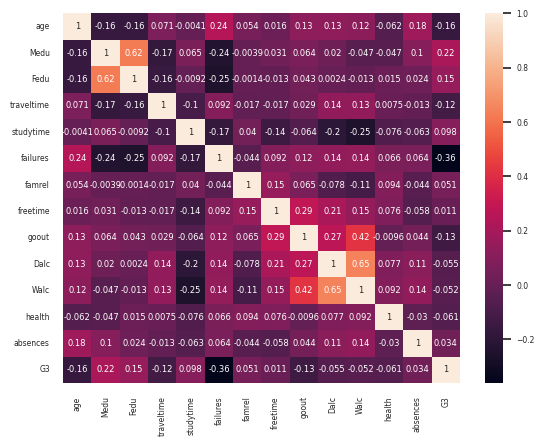

In [59]:
df_corr = df[numeric].corr()
sns.set(font_scale=0.5)
sns.heatmap(df_corr, annot=True)

From above, we can see that failures, Medu, age, and Fedu has the strongest (positive and negative) correlation with G3.

In [60]:
nomOnly = df.copy()
nomOnly.drop(columns=df.columns.difference(nominal), inplace=True)
nomOnly.info

<bound method DataFrame.info of          Mjob      Fjob  reason guardian
0     at_home   teacher  course   mother
1     at_home     other  course   father
2     at_home     other   other   mother
3      health  services    home   mother
4       other     other    home   father
..        ...       ...     ...      ...
390  services  services  course    other
391  services  services  course   mother
392     other     other  course    other
393  services     other  course   mother
394     other   at_home  course   father

[395 rows x 4 columns]>

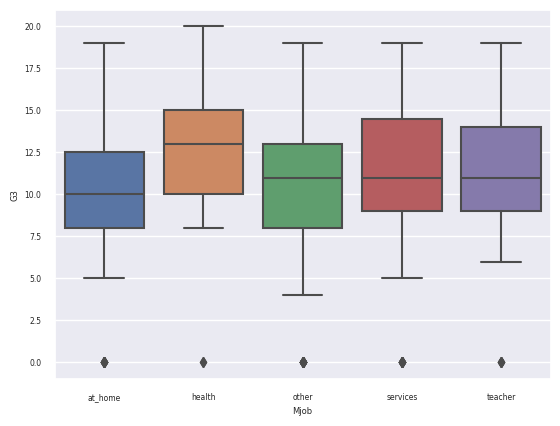

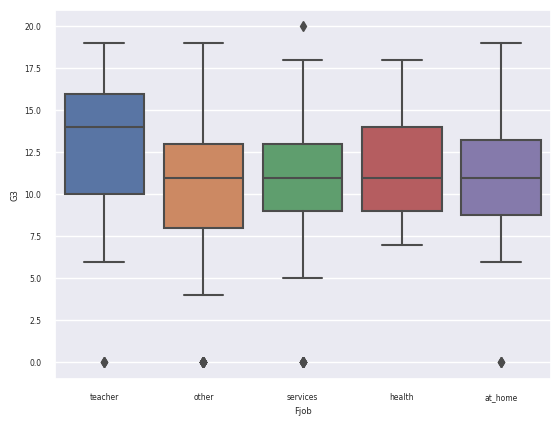

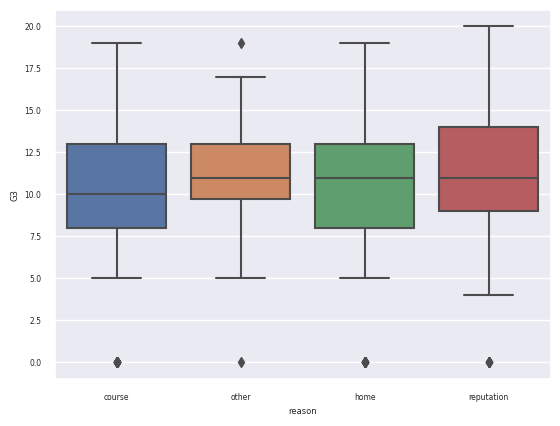

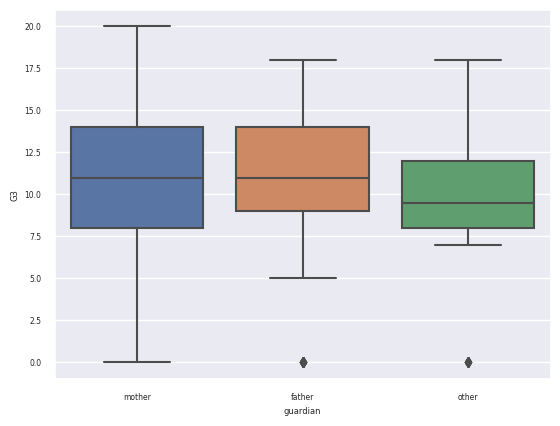

In [61]:
for feature in nomOnly:
    plt.figure()
    sns.boxplot(data=df, x=feature, y='G3')

From above, we can see that out of the nominal data, Mjob=health and Fjob=teacher does significantly better compares to other options

In [62]:
binOnly = df.copy()
binOnly.drop(columns=df.columns.difference(binary), inplace=True)
binOnly.drop(columns='G1', inplace=True)
binOnly.drop(columns='G2', inplace=True)
binOnly.info

<bound method DataFrame.info of     school sex address famsize Pstatus schoolsup famsup paid activities  \
0       GP   F       U     GT3       A       yes     no   no         no   
1       GP   F       U     GT3       T        no    yes   no         no   
2       GP   F       U     LE3       T       yes     no  yes         no   
3       GP   F       U     GT3       T        no    yes  yes        yes   
4       GP   F       U     GT3       T        no    yes  yes         no   
..     ...  ..     ...     ...     ...       ...    ...  ...        ...   
390     MS   M       U     LE3       A        no    yes  yes         no   
391     MS   M       U     LE3       T        no     no   no         no   
392     MS   M       R     GT3       T        no     no   no         no   
393     MS   M       R     LE3       T        no     no   no         no   
394     MS   M       U     LE3       T        no     no   no         no   

    nursery higher internet romantic  
0       yes    yes       no 

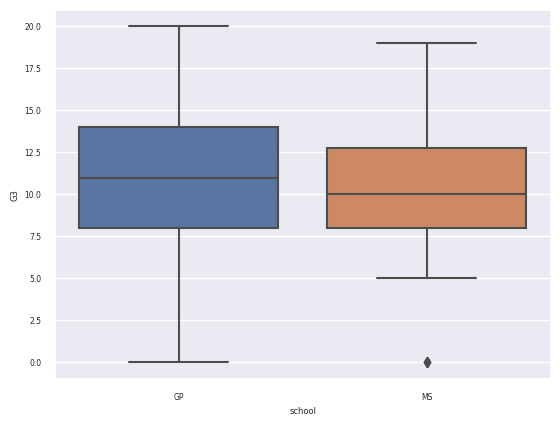

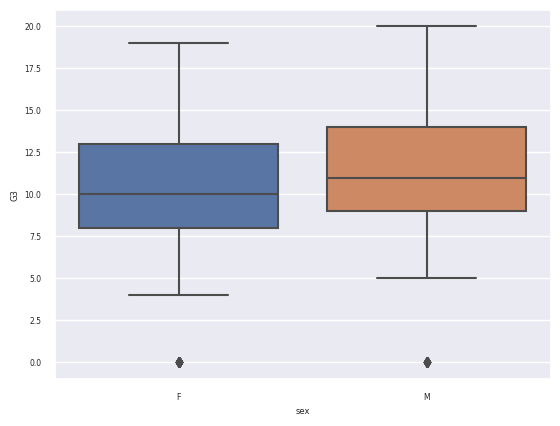

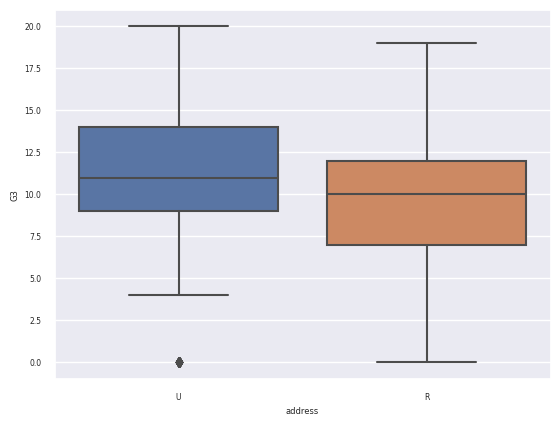

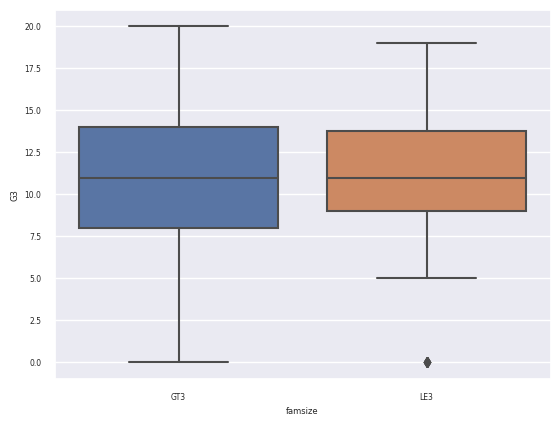

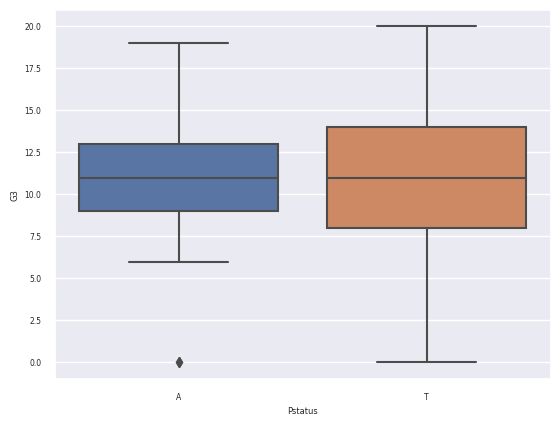

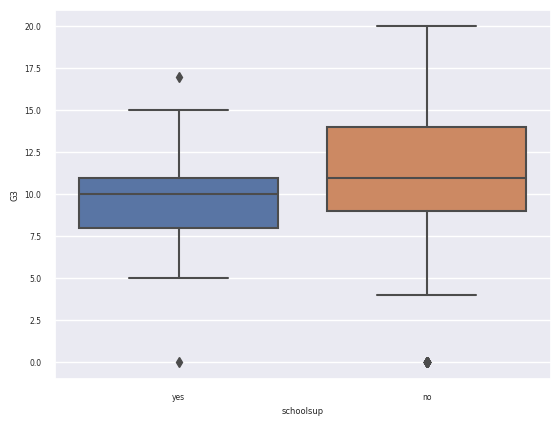

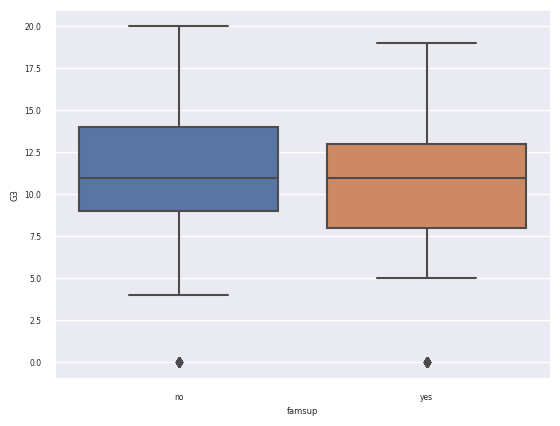

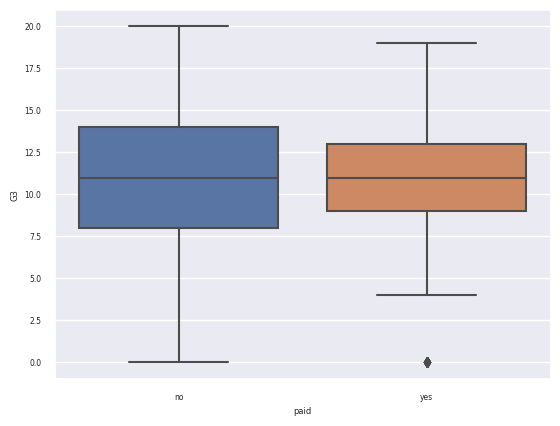

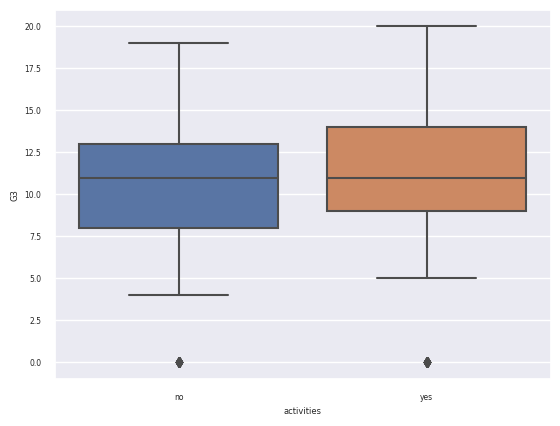

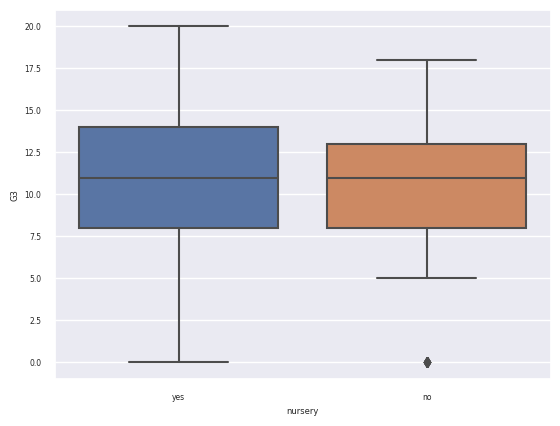

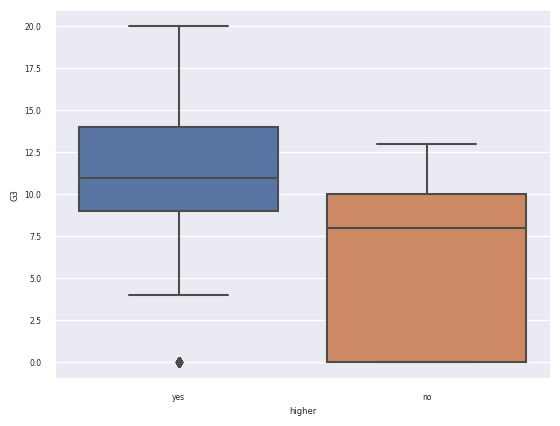

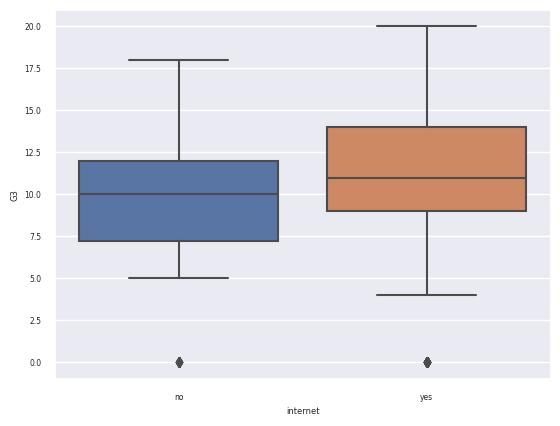

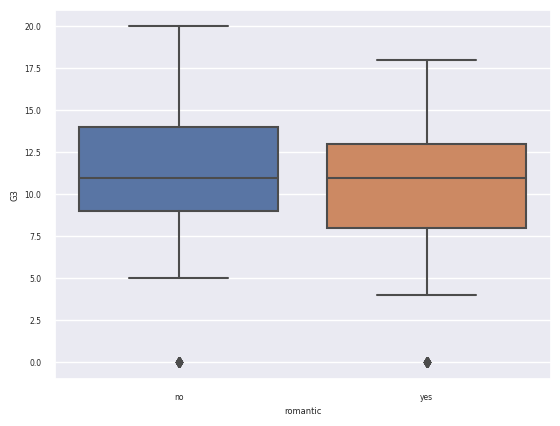

In [63]:
for feature in binOnly:
    plt.figure()
    sns.boxplot(data=df, x=feature, y='G3')

Based on above, we can see that higher=yes correlates with higher G3.

In [148]:
df = pd.read_csv('data/student-mat.csv', sep=';')
# include = ['failures', 'Medu','Mjob','Fjob','higher','G3']
# df.drop(columns=df.columns.difference(include), inplace=True)  # only using 3 features

In [140]:
df.info

<bound method DataFrame.info of      Medu      Mjob      Fjob  failures higher  G3
0       4   at_home   teacher         0    yes   6
1       1   at_home     other         0    yes   6
2       1   at_home     other         3    yes  10
3       4    health  services         0    yes  15
4       3     other     other         0    yes  10
..    ...       ...       ...       ...    ...  ..
390     2  services  services         2    yes   9
391     3  services  services         0    yes  16
392     1     other     other         3    yes   7
393     3  services     other         0    yes  10
394     1     other   at_home         0    yes   9

[395 rows x 6 columns]>

The goal is to predict the quality of the student. We will build a predictor based on the final grade (G3).
Becasue we are trying to find quality students. In this model we define a quality student as one who achieves a final grade of 15 or higher. 

we also only care about if Mjob=health, Fjob=teacher, and higher=yes, so we will clean that too.

In [154]:
df['qual_student'] = np.where(df['G3']>=15, 1, 0)
df['Mjob_health'] = np.where(df['Mjob']=='health', 1, 0)
df['Fjob_teacher'] = np.where(df['Fjob']=='teacher', 1, 0)
df['higher_yes'] = np.where(df['higher']=='yes',1,0)

In [150]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,qual_student
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.184810
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.388636
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


Drop the G3 score

In [213]:
include = ['health','Medu','studytime','absences','age','higher_yes','Fjob_teacher','Mjob_health','qual_student']
# include = ['health', 'absences','age','qual_student']
copy = df.copy()
copy.drop(columns=df.columns.difference(include), inplace=True) 

Import scikit-learn and build a random forest classifer

In [214]:
from sklearn.ensemble import RandomForestClassifier as rf
import sklearn
dependent_variable = 'qual_student'
x = copy[copy.columns.difference([dependent_variable])]
y = copy[dependent_variable]
clf = rf(n_estimators = 1000)
clf.fit(x, y)

RandomForestClassifier(n_estimators=1000)

In [215]:
pred = clf.predict(x)
sklearn.metrics.f1_score(y, pred, average='binary')

0.9650349650349651

It's not very good! We didn't even cross validate. You'll need to do better :)
Let's export this model so we can use it in a microservice (flask api)

In [216]:
import joblib
# modify the file path to where you want to save the model
joblib.dump(clf, 'app/handlers/model.pkl')

['app/handlers/model.pkl']

In [217]:
query_df = pd.DataFrame({ 'age' : pd.Series(1) ,'health' : pd.Series(15) ,'absences' : pd.Series(10),
                        'Fjob_teacher' : pd.Series(1), 'Medu' : pd.Series(4), 
                        'Mjob_health' : pd.Series(0), 'higher_yes' : pd.Series(0),
                        'studytime' : pd.Series(2)})

In [218]:
pred = clf.predict(query_df)

/home/yihanl/.local/share/virtualenvs/fall-22-hw4-team-teedy-us-DF7Ms43I/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [219]:
x

,Fjob_teacher,Medu,Mjob_health,absences,age,health,higher_yes,studytime
0,1,4,0,6,18,3,1,2
1,0,1,0,4,17,3,1,2
2,0,1,0,10,15,3,1,2
3,0,4,1,2,15,5,1,3
4,0,3,0,4,16,5,1,2
...,...,...,...,...,...,...,...,...
390,0,2,0,11,20,4,1,2
391,0,3,0,3,17,2,1,1
392,0,1,0,3,21,3,1,1
393,0,3,0,0,18,5,1,1


In [220]:
type(x)

pandas.core.frame.DataFrame